# Linear Regression project
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('darkgrid')
%matplotlib inline

### Import dataset

In [2]:
df = pd.read_csv('USA_Housing-Copy1.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


**Checking Information of Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Checking the column names of Dataframe
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### EDA
Ploting some simple graphs for checking data

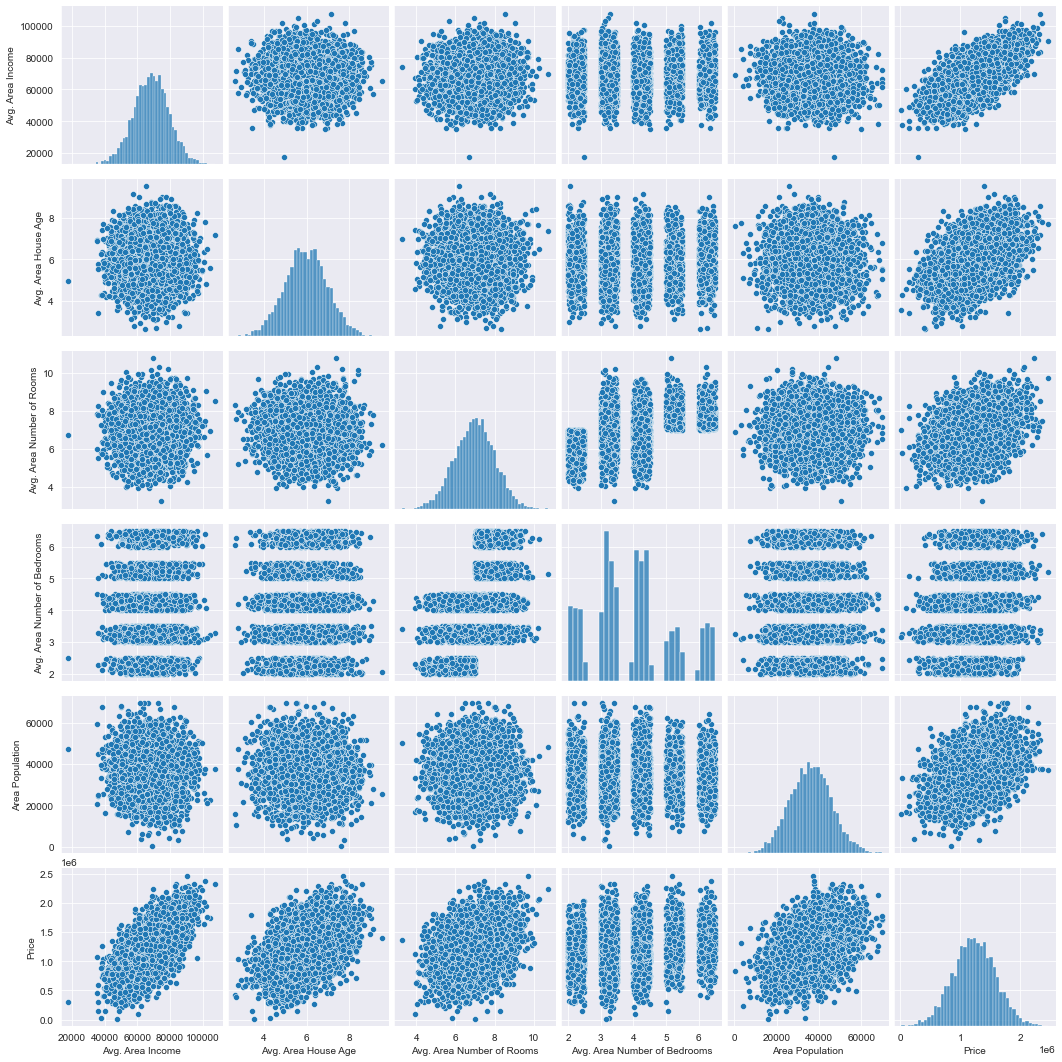

In [7]:
sn.pairplot(df)

### Checking Price ditribution (Average)

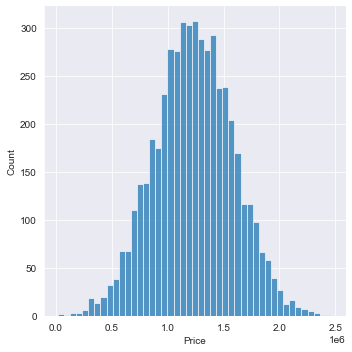

In [8]:
sn.displot(df['Price'])

### Visulzing correlation for each column

In [9]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

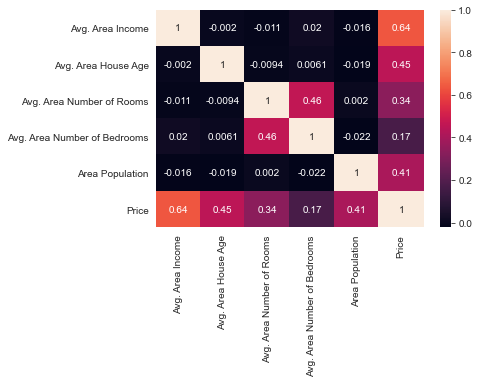

In [10]:
sn.heatmap(df.corr(), annot = True)

**Executing features and labels from dataset using train_test_split**

In [11]:
data = df.drop(['Price','Address'], axis = 1)

In [12]:
target = df[['Price']]

In [13]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=42)

In [16]:
len(X_train)

4000

### Improt Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

### Training of Model

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.score(X_test, y_test)

0.9179971706834602

## Model Evaluation

In [21]:
# Check intercept
model.intercept_

array([-2635072.90093121])

In [22]:
# Cehck Coefficient
model.coef_

array([[2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
        1.52703134e+01]])

In [23]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [24]:
coeff_df = pd.DataFrame(model.coef_,).T
coeff_df

,0
0,21.652206
1,164666.480722
2,119624.012232
3,2440.377611
4,15.270313


In [25]:
columns = pd.DataFrame(data.columns)
columns

,0
0,Avg. Area Income
1,Avg. Area House Age
2,Avg. Area Number of Rooms
3,Avg. Area Number of Bedrooms
4,Area Population


In [26]:
coeff_df['Columns'] = data.columns

In [27]:
coeff_df

,0,Columns
0,21.652206,Avg. Area Income
1,164666.480722,Avg. Area House Age
2,119624.012232,Avg. Area Number of Rooms
3,2440.377611,Avg. Area Number of Bedrooms
4,15.270313,Area Population


**Interpreting the coefficients:**


- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.


## Predictions from Model

In [28]:
model.predict(X_test[:10])

array([[1308587.92699714],
       [1237037.22949391],
       [1243429.34030722],
       [1228900.21360437],
       [1063320.90710747],
       [1544058.05034817],
       [1094774.70493034],
       [ 833284.72339249],
       [ 788412.85578756],
       [1469714.86615696]])

In [29]:
y_prediction = model.predict(X_test)

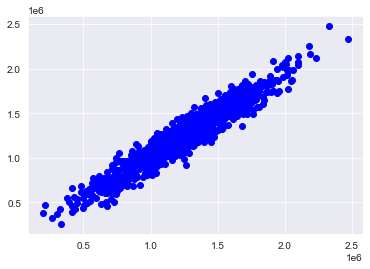

In [30]:
plt.scatter(y_test, y_prediction, color = 'blue')

### Residual Histogram
The Histogram of the Residual can be used to check whether the variance is normally distributed. ... If the histogram indicates that random error is not normally distributed, it suggests that the model's underlying assumptions may have been violated.

<AxesSubplot:ylabel='Count'>

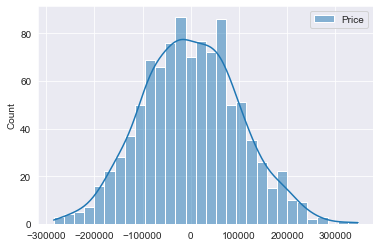

In [31]:
sn.histplot(y_test-y_prediction, bins = 30, kde = True, color = 'red')

## Regression Evaluation Metrices

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [32]:
from sklearn import metrics

In [33]:
print ('MAE: ', metrics.mean_absolute_error(y_test, y_prediction))
print ('MSE: ', metrics.mean_squared_error(y_test, y_prediction))
print ('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE:  80879.0972348696
MSE:  10089009300.89066
RMSE:  100444.06055556824
